<a href="https://colab.research.google.com/github/LongNguyen1984/AFE4300-Arduino/blob/master/DisplayTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas

# New Section

In [2]:
def load_data(filename):
  dataset = read_csv(filename, header=0);
  data = dataset.values;
  return data

In [7]:
from pandas import read_csv

dataset = read_csv('drive/My Drive/Dataset/GlucoseLong02_12Mar.csv', header=0)

<bound method NDFrame.head of       Index  ... Transmitter ID
0         1  ...            NaN
1         2  ...            NaN
2         3  ...            NaN
3         4  ...            NaN
4         5  ...            NaN
...     ...  ...            ...
2811   2812  ...         8KMNYT
2812   2813  ...         8KMNYT
2813   2814  ...         8KMNYT
2814   2815  ...         8KMNYT
2815   2816  ...         8KMNYT

[2816 rows x 14 columns]>


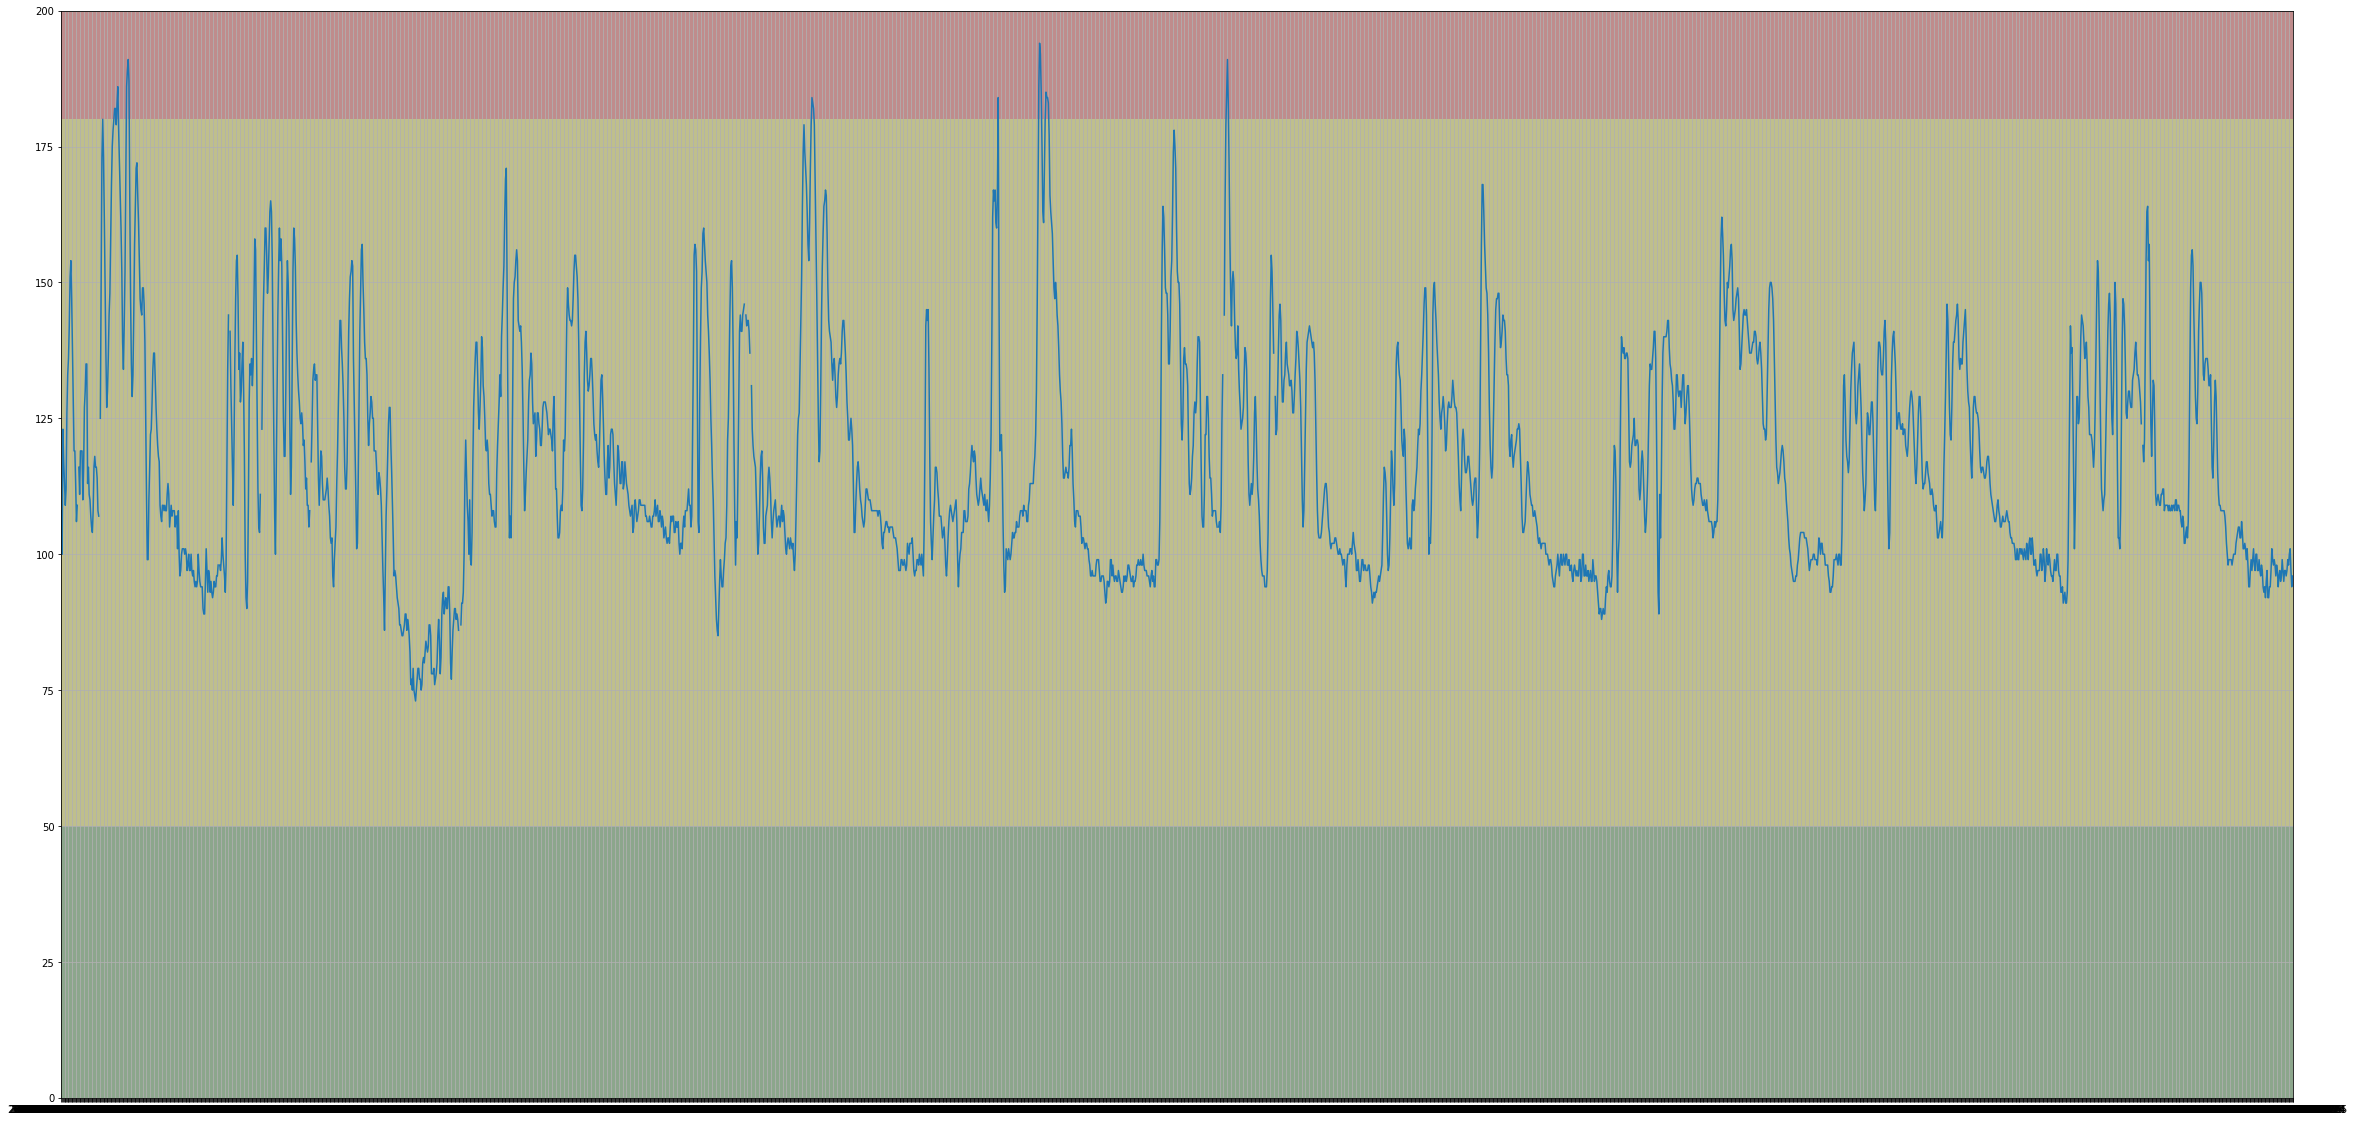

In [16]:
import matplotlib.pyplot as plt

print(dataset.head)
data = dataset.values
t = data[11:,1]
glucose = data[11:,7]
# plot data with different background

fig, ax = plt.subplots(1,figsize=(40,20))

ax.plot(t, glucose)
ax.grid()
ax.margins(0) # remove default margins (matplotlib verision 2+)

ax.axhspan(0, 50, facecolor='yellow', alpha=1)
ax.axhspan(50, 180, facecolor='green', alpha=1)
ax.axhspan(180, 200, facecolor='red', alpha=1)

plt.show()



In [34]:
# seperate data to display
time = [date.split('T') for date in t]
dates = [ date for date, hour in time]
hours = [ hour for date, hour in time]

In [45]:
dates[0], hours[0]

('2021-03-02', '16:10:01')

In [56]:
dates[1000:1005]

['2021-03-06', '2021-03-06', '2021-03-06', '2021-03-06', '2021-03-06']

In [75]:
import datetime 
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange 

date1 = datetime.datetime(2020, 4, 2) 
date2 = datetime.datetime(2020, 4, 6) 
delta = datetime.timedelta(hours = 6) 
dates1 = drange(date1, date2, delta)

In [79]:
date1

datetime.datetime(2020, 4, 2, 0, 0)

Covert date in Format %Y-%M-%D to %D-%M-%Y

In [73]:
def convert_date_format(s):
  date=s.split("-")
  return date[2]+"-"+date[1]+"-"+ date[0]
#convert to new format
dates_new = [convert_date_format(date) for date in dates]
dates_full = [date + ' ' + hour for date, hour in zip(dates_new, hours)]
dates_full[0], t[0]

('02-03-2021 16:10:01', '2021-03-02T16:10:01')

In [81]:
from datetime import datetime

date_str1 = dates_new[0] + ' ' + hours[0]
date_str2 = dates_new[1] + ' ' + hours[1]
# Considering date is in dd/mm/yyyy format
date_obj1 = datetime.strptime(date_str1, "%d-%m-%Y %H:%M:%S")
date_obj2 = datetime.strptime(date_str2, "%d-%m-%Y %H:%M:%S")
print("dt_object1:", date_obj1)


dt_object1: 2021-03-02 16:10:01


In [98]:
import plotly.graph_objects as go

from pandas import read_csv

df = read_csv('drive/My Drive/Dataset/GlucoseLong02_12Mar.csv')
print(df.head)

fig = go.Figure([go.Scatter(x=df['Timestamp (YYYY-MM-DDThh:mm:ss)'], y=df['Glucose Value (mg/dL)'])])
#fig.update_layout(legend_title_text = "Glucose Concentration in 10 Days")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Glucose Value (mg/dL)")
#fig.update_xaxes(range=[1.5, 4.5])
fig.update_yaxes(range=[0, 250])

#fig.add_hline(y=50)
#fig.add_hline(y=180)


fig.show()



<bound method NDFrame.head of       Index  ... Transmitter ID
0         1  ...            NaN
1         2  ...            NaN
2         3  ...            NaN
3         4  ...            NaN
4         5  ...            NaN
...     ...  ...            ...
2811   2812  ...         8KMNYT
2812   2813  ...         8KMNYT
2813   2814  ...         8KMNYT
2814   2815  ...         8KMNYT
2815   2816  ...         8KMNYT

[2816 rows x 14 columns]>


In [ ]:
import plotly.express as px

from pandas import read_csv

df = read_csv('drive/My Drive/Dataset/GlucoseLong02_12Mar.csv')

